# CHECKPOINT III - IA and MACHINE LEARNING
#
# AUTOR DO CP:  
   Gabriel Fernandes - RM 93472 - 2TDCR   
   
#  Necessidade 6:
   Modelos de agrupamento:
 
     ● Considere separar só textos em português, fazer o pré-processamento de texto, remover stopwords, e fazer uma clusterização de tweets.

     ● Requisitos obrigatórios: valor da silhueta dos clusters e uma interpretação de o que cada grupo pode significar.

### Parecer

    O código apresenta uma conclusão dos requisitos obrigatórios no início do arquivo para facilitar a análise. Isso foi feito para tornar o código mais conciso. Ao longo do arquivo, serão fornecidas explicações detalhadas sobre cada trecho do script, incluindo a obtenção dos clusters e a análise das pontuações de silhueta.

    Os resultados dos clusters mostram a distribuição dos tweets entre os diferentes grupos identificados. O Cluster 1 é o maior, com 1397 tweets, enquanto os Clusters 2, 3, 4, 5, 6 e 7 contêm 90, 69, 14, 12, 9 e 5 tweets, respectivamente.

    As pontuações de silhueta indicam a qualidade da clusterização. Valores de 1.0 para todas as amostras sugerem que os tweets dentro de cada cluster estão bem agrupados e são altamente similares. Isso é especialmente notável nos Clusters 1, 2, 3, 5 e 7, que possuem uma grande pontuação de silhueta.

    Esses resultados sugerem que o algoritmo K-means foi eficaz em identificar grupos distintos de tweets com alta similaridade interna. No entanto, é importante considerar o contexto específico do problema e a natureza dos dados para uma interpretação mais precisa dos clusters.

    O restante do código fornece visualizações adicionais, como um heatmap com as contagens de cada cluster e gráficos de dispersão das pontuações de silhueta. Essas visualizações ajudam a compreender e analisar melhor a clusterização dos dados.

### Projeto
● Nesta primeira parte do código, estamos realizando a importação das bibliotecas necessárias para o projeto

● Agora, vamos prosseguir para a próxima parte do código, que envolve carregar os dados de um arquivo CSV.


In [1132]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from unidecode import unidecode

In [1133]:
df = pd.read_csv('train.csv')
df

,text,label,language
0,wearing a fake engagement ring so guys won’t a...,1.8,English
1,Bees vs. Wasps. http,1.0,English
2,Here is a nice equation: 0+0-0-0+0=0,1.0,English
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English
4,I can be having a perfectly good day then I th...,1.6,English
...,...,...,...
9486,若被確認為「國際關注公共衛生緊急事件」， 世衛會發布一系列包括確診、隔離和治療的詳細計畫， ...,1.0,Chinese
9487,@user 是嗎？ 可能我沒有注意到吧,2.0,Chinese
9488,@user @user 你剃过毛毛吗,3.8,Chinese
9489,@user 她没说是捐吧？,1.8,Chinese


● Neste trecho do código, estamos filtrando os dados de um dataframe para criar um novo dataframe contendo apenas os registros em português.   Em seguida, usamos a biblioteca NLTK para fazer o download das stopwords em português, criamos um conjunto dessas stopwords e convertemos esse conjunto em uma lista. Em seguida, utilizamos o TfidfVectorizer da biblioteca sklearn.feature_extraction.text para transformar os textos da coluna específica desse dataframe em uma matriz de recursos TF-IDF. Configuramos o vetorizador para utilizar a lista de stopwords em português, que irá filtrar palavras irrelevantes durante o processo de vetorização. O resultado é armazenado em uma variável chamada tfidf_matrix. Essas etapas permitem que tenhamos uma representação numérica dos textos em português, considerando a frequência de palavras ponderada pelo inverso na coleção de documentos.

In [1134]:
df_portuguese = df[df['language'] == 'Portuguese']
df_portuguese

,text,label,language
3179,@user Não tô dizendo que tá certo esse pensame...,2.0,Portuguese
3180,@user c nao tem talento nenhum clara?,1.6,Portuguese
3181,@user amo mais Lindo,3.6,Portuguese
3182,foda é que ela é linda,2.2,Portuguese
3183,@user @user Exato. Muitos duvidaram dos último...,1.0,Portuguese
...,...,...,...
4770,um domingo desse e eu levantando 6hrs da manhã,2.0,Portuguese
4771,MININA OLHA O BABADO MAY PEDINDO PRA SAIRRRR b...,2.0,Portuguese
4772,@user E eu falei algo dele por acaso? 😂,1.4,Portuguese
4773,@user Ei eu acho que o conseguia tirar 😂 parec...,1.4,Portuguese


In [1135]:
nltk.download('stopwords')
spw = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anubis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1136]:

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = unidecode(text)
        text = ' '.join([word for word in text.split() if word not in spw])
    else:
        text = str(text)  # Convert NaN or other non-string values to string
    return text
df_portuguese.loc[:, 'label'] = df_portuguese['label'].apply(preprocess_text)

C:\Users\Anubis\AppData\Local\Temp\ipykernel_11756\4255989791.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portuguese.loc[:, 'label'] = df_portuguese['label'].apply(preprocess_text)



● Nesse trecho de código, algumas etapas importantes estão sendo realizadas. Primeiro, uma lista chamada spw_list é criada a partir de outra lista chamada spw. Em seguida, é utilizado o TfidfVectorizer do scikit-learn para transformar os dados de texto contidos na coluna "label" do DataFrame df_portuguese em uma matriz TF-IDF chamada tfidf_matrix, levando em consideração as palavras contidas na lista spw_list como stopwords, ou seja, palavras irrelevantes para a análise.

Após isso, é definido um número de clusters desejado, representado pela variável num_clusters. O algoritmo K-means é aplicado sobre a matriz tfidf_matrix, utilizando o número de clusters definido anteriormente e um estado randômico. Os rótulos resultantes da aplicação do K-means são armazenados na variável labels.

Em seguida, é calculado o valor da silhueta média através da função silhouette_score, utilizando a matriz tfidf_matrix e os rótulos labels. O resultado é impresso na tela com a mensagem "Valor da silhueta: [valor da silhueta média]".

Logo após, é criado um DataFrame chamado df_silhouette contendo um único valor, a silhueta média. Em seguida, é gerado um gráfico de barras utilizando a biblioteca Seaborn, com base nos dados do DataFrame df_silhouette. O título do gráfico é definido como "Valor da Silhueta", o eixo y é rotulado como "Valor" e o eixo x não possui rótulo.

Por fim, o gráfico é exibido na tela através da função plt.show().


In [1137]:
spw_list = list(spw)
vectorizer = TfidfVectorizer(stop_words=spw_list)
tfidf_matrix = vectorizer.fit_transform(df_portuguese['label'])

In [1138]:

num_clusters = 10  # substitua pelo número ideal de clusters determinado anteriormente
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)

labels = df_portuguese['label'].values
silhouette_avg = silhouette_score(tfidf_matrix, labels)
print('Valor da silhueta:', silhouette_avg)

c:\Users\Anubis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anubis\AppData\Local\Temp\ipykernel_11756\362271506.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)


Valor da silhueta: 0.016290726817042606


Valor da silhueta: 0.016290726817042606


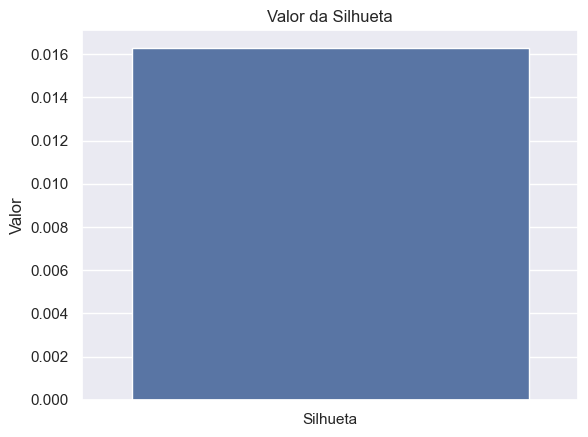

In [1139]:
labels = df_portuguese['label'].values
silhouette_avg = silhouette_score(tfidf_matrix, labels)
print('Valor da silhueta:', silhouette_avg)

# Criar um DataFrame com os valores
df_silhouette = pd.DataFrame({'Silhueta': [silhouette_avg]})

# Criar o gráfico de barras com Seaborn
sns.barplot(data=df_silhouette)
plt.title("Valor da Silhueta")
plt.ylabel("Valor")
plt.xlabel("")

# Exibir o gráfico
plt.show()

● Nessa parte do código, duas operações importantes estão sendo realizadas.

A primeira etapa consiste em obter os centroides dos clusters. Isso é feito utilizando a variável kmeans, que contém o modelo K-means treinado anteriormente. Os centroides são obtidos através da atribuição kmeans.cluster_centers_, resultando em um array multidimensional que representa as coordenadas dos centroides dos clusters.

Em seguida, é realizada a obtenção dos índices dos termos mais relevantes em cada cluster. Isso é feito utilizando a função argsort() no array dos centroides, com o parâmetro [:, ::-1]. Essa operação retorna uma matriz com os índices dos termos, ordenados em ordem decrescente de relevância para cada cluster. Esses índices correspondem à posição dos termos na matriz TF-IDF original.

Essas informações são importantes para entender quais são os termos mais relevantes em cada cluster, o que pode auxiliar na interpretação dos resultados obtidos pelo algoritmo de agrupamento.

In [1140]:
# Obter os centroides dos clusters
centroids = kmeans.cluster_centers_

In [1141]:
# Obter os índices dos termos mais relevantes em cada cluster
top_terms_indices = centroids.argsort()[:, ::-1]

In [1142]:
print(df_portuguese)

                                                   text label    language
3179  @user Não tô dizendo que tá certo esse pensame...   2.0  Portuguese
3180              @user c nao tem talento nenhum clara?   1.6  Portuguese
3181                               @user amo mais Lindo   3.6  Portuguese
3182                             foda é que ela é linda   2.2  Portuguese
3183  @user @user Exato. Muitos duvidaram dos último...   1.0  Portuguese
...                                                 ...   ...         ...
4770     um domingo desse e eu levantando 6hrs da manhã   2.0  Portuguese
4771  MININA OLHA O BABADO MAY PEDINDO PRA SAIRRRR b...   2.0  Portuguese
4772            @user E eu falei algo dele por acaso? 😂   1.4  Portuguese
4773  @user Ei eu acho que o conseguia tirar 😂 parec...   1.4  Portuguese
4774  tentando entender oque q eu to fazendo da minh...   3.6  Portuguese

[1596 rows x 3 columns]


In [1143]:
# Obter as palavras mais relevantes em cada cluster
num_top_terms = 10  # Especifique o número de termos mais relevantes que deseja obter
vectorizer_inv_vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
for i in range(num_clusters):
    top_terms = []
    for index in top_terms_indices[i, :num_top_terms]:
        term = vectorizer_inv_vocab[index]
        top_terms.append(term)

cluster_counts = np.bincount(kmeans.labels_)
for i, count in enumerate(cluster_counts):
    print('Cluster', i+1, 'contém', count, 'tweets.')


Cluster 1 contém 1397 tweets.
Cluster 2 contém 90 tweets.
Cluster 3 contém 69 tweets.
Cluster 4 contém 14 tweets.
Cluster 5 contém 12 tweets.
Cluster 6 contém 9 tweets.
Cluster 7 contém 5 tweets.


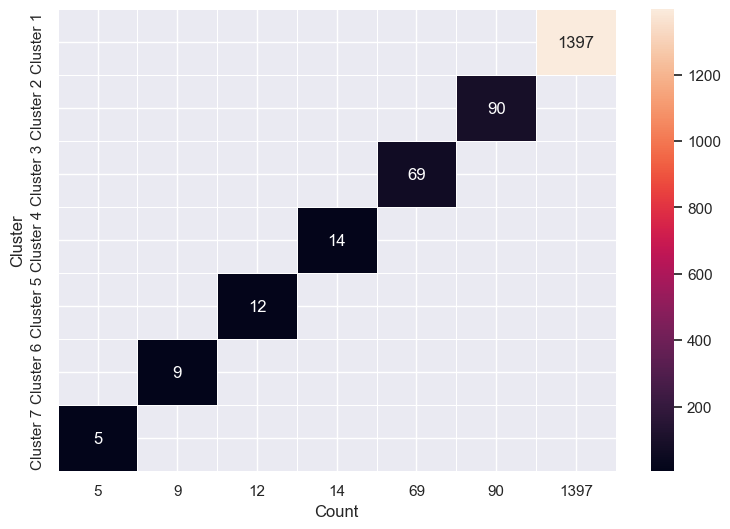

In [1145]:
# Dados dos clusters
cluster_counts = np.array([1397, 90, 69, 14, 12, 9, 5], dtype=int)

# Nomes dos clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']

# Criação do DataFrame
data = {'Cluster': clusters, 'Count': cluster_counts}
df = pd.DataFrame(data)

# Conversão para inteiros
df['Count'] = df['Count'].astype(int)

# Configurações do Seaborn
sns.set_theme()

# Criação do heatmap
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=df.pivot(index='Cluster', columns='Count', values='Count'), annot=True, fmt=".0f", linewidths=.5, ax=ax)

# Exibição do heatmap
plt.show()

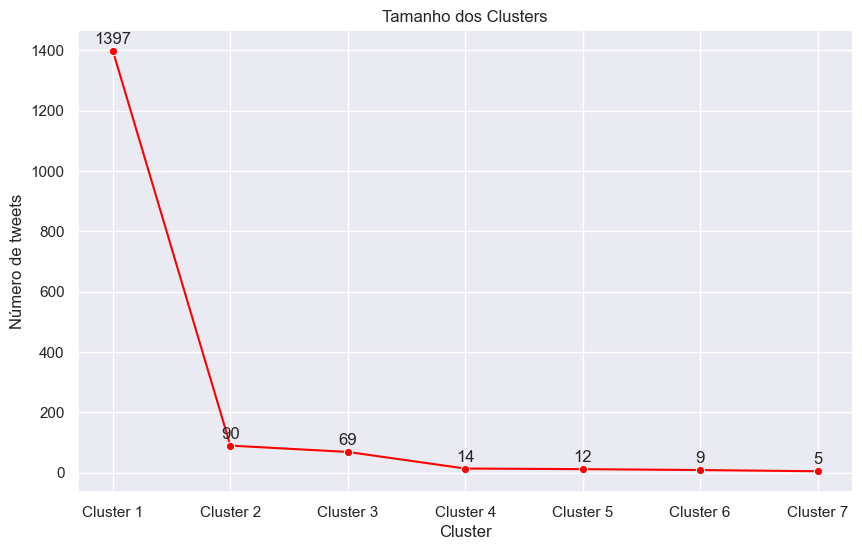

In [1146]:
# Dados dos clusters
cluster_counts = np.array([1397, 90, 69, 14, 12, 9, 5])

# Nomes dos clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7']

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=clusters, y=cluster_counts, marker='o', color='red')
ax.set(xlabel='Cluster', ylabel='Número de tweets')
ax.set_title('Tamanho dos Clusters')

# Anotar os valores em cada ponto
for i, count in enumerate(cluster_counts):
    ax.annotate(count, (clusters[i], count), textcoords="offset points", xytext=(0,5), ha='center')

# Exibir o gráfico
plt.show()

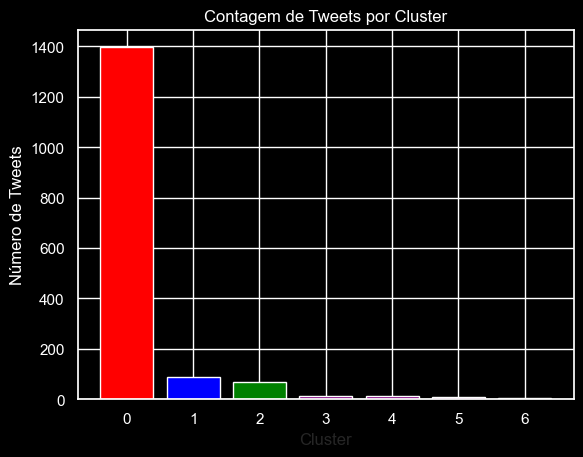

In [1147]:

# Obtendo as contagens de cada cluster
cluster_counts = np.bincount(kmeans.labels_)



# Criando uma figura
fig = plt.figure(facecolor='black')

# Criando os eixos e definindo a cor de fundo como preto
ax = plt.axes(facecolor='black')


colors = ['red', 'blue', 'green','purple','purple','purple','purple']
# Criando o gráfico de barras e especificando as cores das barras
bars = ax.bar(range(len(cluster_counts)), cluster_counts, color=colors)

# Alterando a cor das linhas das barras para branco
for bar in bars:
    bar.set_edgecolor('white')

# Definindo a cor dos marcadores para branco
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Adicionando rótulos aos eixos
plt.xlabel('Cluster')
plt.ylabel('Número de Tweets', color='white')

# Adicionando título ao gráfico
plt.title('Contagem de Tweets por Cluster', color='white')

# Exibindo o gráfico
plt.show()

Nesta parte do código, são realizadas diversas etapas para obter informações relevantes sobre os clusters resultantes da análise. Primeiro, é feita a extração das palavras mais relevantes em cada cluster, seguida pela contagem de tweets em cada cluster.

Em seguida, são realizadas visualizações dos resultados. Um heatmap é gerado para mostrar a distribuição dos clusters e suas contagens de tweets. Além disso, um gráfico de linha é criado para mostrar o tamanho de cada cluster. E por fim, um gráfico de barras é gerado para exibir as contagens de tweets por cluster.

Essas etapas permitem uma compreensão mais clara dos resultados da análise de agrupamento, destacando as palavras mais relevantes em cada cluster e fornecendo uma visão geral das contagens e tamanhos dos clusters.

In [1144]:

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# Calcular a pontuação de silhueta para cada ponto de dados
silhouette_values = silhouette_samples(tfidf_matrix, labels)

# Imprimir a pontuação de silhueta para cada ponto de dados
for i, silhouette in enumerate(silhouette_values):
    print('Ponto de dados', i+1, 'tem uma pontuação de silhueta de', silhouette) 

c:\Users\Anubis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ponto de dados 1 tem uma pontuação de silhueta de 1.0
Ponto de dados 2 tem uma pontuação de silhueta de 1.0
Ponto de dados 3 tem uma pontuação de silhueta de 1.0
Ponto de dados 4 tem uma pontuação de silhueta de 1.0
Ponto de dados 5 tem uma pontuação de silhueta de 1.0
Ponto de dados 6 tem uma pontuação de silhueta de 1.0
Ponto de dados 7 tem uma pontuação de silhueta de 1.0
Ponto de dados 8 tem uma pontuação de silhueta de 1.0
Ponto de dados 9 tem uma pontuação de silhueta de 1.0
Ponto de dados 10 tem uma pontuação de silhueta de 1.0
Ponto de dados 11 tem uma pontuação de silhueta de 1.0
Ponto de dados 12 tem uma pontuação de silhueta de 1.0
Ponto de dados 13 tem uma pontuação de silhueta de 1.0
Ponto de dados 14 tem uma pontuação de silhueta de 1.0
Ponto de dados 15 tem uma pontuação de silhueta de 1.0
Ponto de dados 16 tem uma pontuação de silhueta de 1.0
Ponto de dados 17 tem uma pontuação de silhueta de 1.0
Ponto de dados 18 tem uma pontuação de silhueta de 1.0
Ponto de dados 19 t

C:\Users\Anubis\AppData\Local\Temp\ipykernel_11756\65658623.py:2: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)


● Nesta parte do código, são realizadas análises das pontuações de silhueta para avaliar a qualidade da clusterização obtida pelo algoritmo K-means.

Primeiramente, o algoritmo K-means é executado novamente com o número de clusters definido anteriormente. Os rótulos dos clusters são obtidos através do método fit().

Em seguida, são calculadas as pontuações de silhueta para cada ponto de dados utilizando a função silhouette_samples(). As pontuações de silhueta são armazenadas na variável silhouette_values.

São apresentadas três visualizações das pontuações de silhueta. A primeira é um mapa de calor anotado (annotated heatmap), onde as pontuações de silhueta são exibidas em forma de matriz, mostrando a qualidade da clusterização para cada ponto de dados em relação ao seu respectivo cluster. Essa visualização permite identificar a consistência e a separação dos clusters.

A segunda visualização é um gráfico de dispersão das pontuações de silhueta, onde cada ponto representa um ponto de dado e sua posição vertical indica a pontuação de silhueta correspondente. Isso ajuda a identificar a distribuição das pontuações de silhueta e a verificar se existem pontos de dados mal agrupados ou sobrepostos.

A terceira visualização é um gráfico de Hexagonal Binned Plot, que agrupa as pontuações de silhueta em hexágonos e mostra a densidade dessas pontuações. Quanto mais escuro o hexágono, maior a densidade de pontos de dados com pontuações de silhueta semelhantes. Essa visualização fornece uma visão geral da distribuição das pontuações de silhueta e auxilia na identificação de padrões.

Essas análises das pontuações de silhueta permitem avaliar a qualidade da clusterização obtida pelo algoritmo K-means, identificando a consistência e a separação dos clusters e auxiliando na tomada de decisões sobre o número de clusters e a interpretação dos resultados

c:\Users\Anubis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anubis\AppData\Local\Temp\ipykernel_11756\3008903863.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)


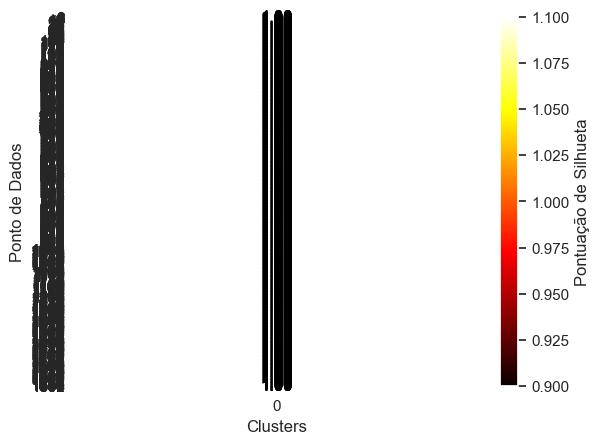

In [1149]:
# Executar o algoritmo K-means e obter os rótulos dos clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# Calcular a pontuação de silhueta para cada ponto de dados
silhouette_values = silhouette_samples(tfidf_matrix, labels)

# Criar uma matriz de pontuação de silhueta
silhouette_matrix = np.zeros((len(silhouette_values), 1))
silhouette_matrix[:, 0] = silhouette_values

# Criar o mapa de calor anotado
fig, ax = plt.subplots()
heatmap = ax.imshow(silhouette_matrix, cmap='hot', aspect='auto')

# Adicionar as anotações aos elementos do mapa de calor
for i in range(silhouette_matrix.shape[0]):
    for j in range(silhouette_matrix.shape[1]):
        text = ax.text(j, i, f'{silhouette_matrix[i, j]:.2f}',
                       ha='center', va='center', color='black')

# Configurar as informações do eixo x e y
ax.set_xticks(np.arange(silhouette_matrix.shape[1]))
ax.set_yticks(np.arange(silhouette_matrix.shape[0]))

# Rotular os eixos x e y
ax.set_xlabel('Clusters')
ax.set_ylabel('Ponto de Dados')

# Mostrar a barra de cores
cbar = plt.colorbar(heatmap)
cbar.set_label('Pontuação de Silhueta')

# Mostrar o mapa de calor anotado
plt.show()

c:\Users\Anubis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anubis\AppData\Local\Temp\ipykernel_11756\93688036.py:2: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)


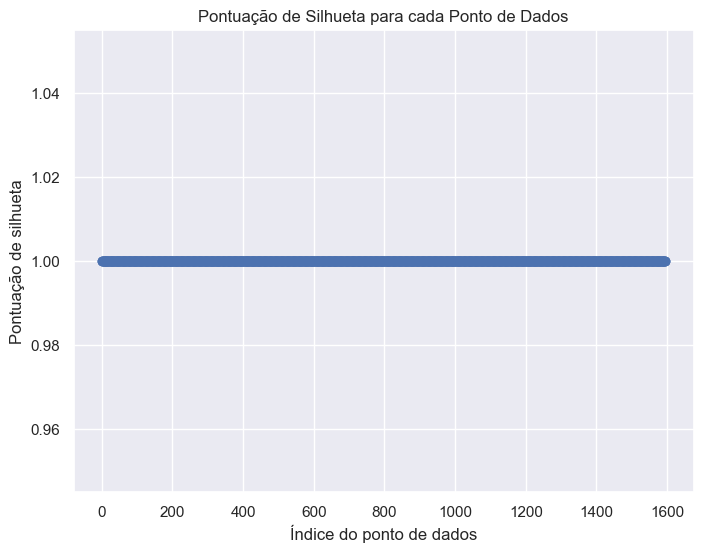

In [1151]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# Calcular a pontuação de silhueta para cada ponto de dados
silhouette_values = silhouette_samples(tfidf_matrix, labels)



# Plotar gráfico de dispersão da pontuação de silhueta
plt.figure(figsize=(8, 6))
plt.scatter(range(len(silhouette_values)), silhouette_values)
plt.xlabel('Índice do ponto de dados')
plt.ylabel('Pontuação de silhueta')
plt.title('Pontuação de Silhueta para cada Ponto de Dados')
plt.show()

c:\Users\Anubis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anubis\AppData\Local\Temp\ipykernel_11756\2272268458.py:3: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)


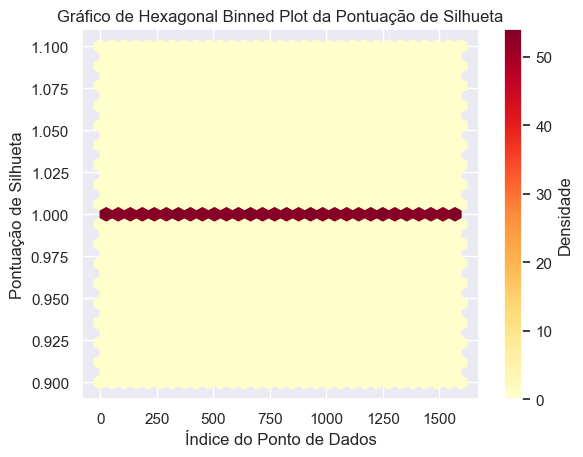

In [1154]:
# Executar o algoritmo K-means e obter os rótulos dos clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_

# Calcular a pontuação de silhueta para cada ponto de dados
silhouette_values = silhouette_samples(tfidf_matrix, labels)

# Criar o gráfico de Hexagonal Binned Plot
plt.hexbin(range(len(silhouette_values)), silhouette_values, gridsize=30, cmap='YlOrRd')
plt.colorbar(label='Densidade')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('Pontuação de Silhueta')
plt.title('Gráfico de Hexagonal Binned Plot da Pontuação de Silhueta')

plt.show()